First test the sqw stuff on something I know I'll understand, a spherical wave.

The wave will have the following functional form:
$$ f(r,t) = \sin(k_0 r + \omega_0 t) $$

The Fourier transform of isa delta function in frequency, $\delta(\omega-\omega_0)$, but in space it's a bit harder. I thought it would just be a delta function in space, $\delta(|\vec{k}| - k_0)$, but it turns out to involve an integral over a Bessel Function of the first kind. Specifically:

$$ \int\limits_0^{\infty} \; dr \; r J_0(kr) e^{ik_0 r} $$

So we don't really get zero signal in the $\omega$ direction.

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook

import numpy as np
import scipy.integrate as integrate
import dynamicstructurefactor.sqw as sqw
import os

In [2]:
savestuff = False
savepath = '/media/daniel/storage1/Dropbox/LLM_Danny/excitableMembranes/sphericalWaveTest/'

# Set up parameters
nx = 50 # Maximum index in either direction
ny = 50
nt = 50 # number of time points
dx = .1 # spacing between measured points
dy = .1 
dt = .1 # time between each time point

xArr = np.linspace(-nx/2, nx/2, nx) * dx
yArr = np.linspace(-ny/2, ny/2, ny) * dy
tArr = np.linspace(0, nt - 1, nt) * dt

# Set up grid in real space, remembering to multiply by the 
# sampling periods in time and space
xx,yy,tt = np.meshgrid(yArr, xArr, tArr)

# Spatial and temporal frequency (in radians/length or time)
k0 = 2
w0 = 15
k1 = 15
w1 = 4

# Center offset
x0 = 0 * dx
y0 = 0 * dy
x1 = 0 * dx
y1 = 0 * dy

Enter the functional form to analyze and get it's power spectrum

In [3]:
# Function and its power spectrum
r0 = ((xx-x0)**2 + (yy-y0)**2)**0.5
r1 = ((xx-x1)**2 + (yy-y1)**2)**0.5
rt = np.sin(k0*r0 - w0*tt) + np.sin(k1*r1 + w1*tt)
qwPower, [qx, qy, ww] = sqw.power_spectrum(rt, 
                                      spacings=[dy,dx,dt],
                                      window='bartlett',
                                      onesided=False,
                                      normalize=False)

NameError: name 'dimsize' is not defined

In [59]:
qy.max()

30.159289474462017

Plot the resulting power spectrum in both the real and fourier domain

<IPython.core.display.Javascript object>


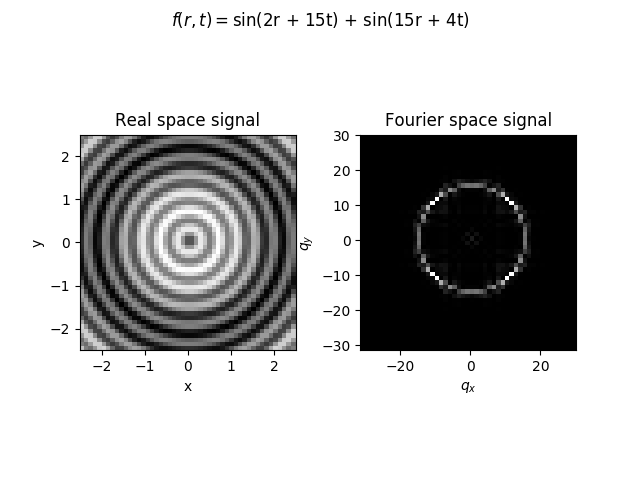

<IPython.core.display.Javascript object>


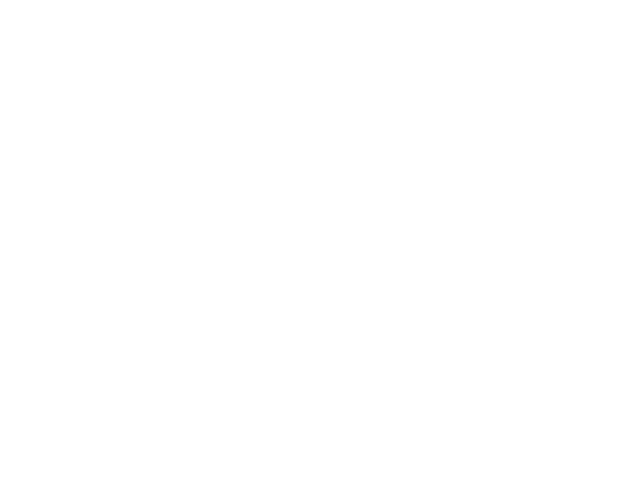

<IPython.core.display.Javascript object>


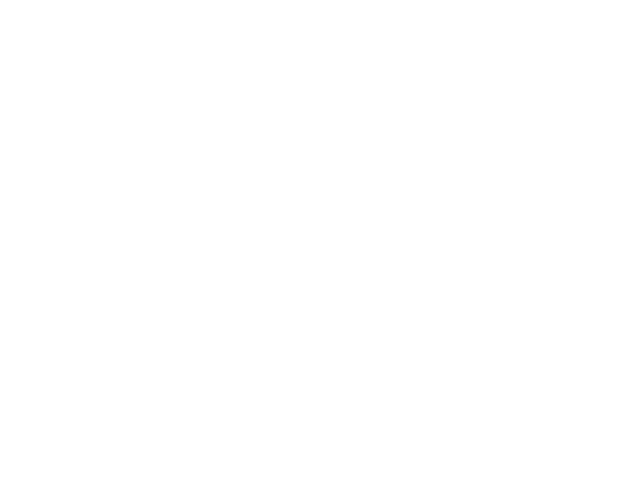

<IPython.core.display.Javascript object>


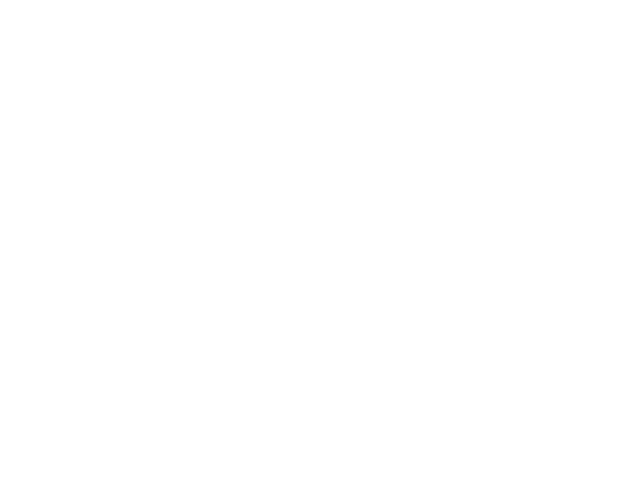

<IPython.core.display.Javascript object>


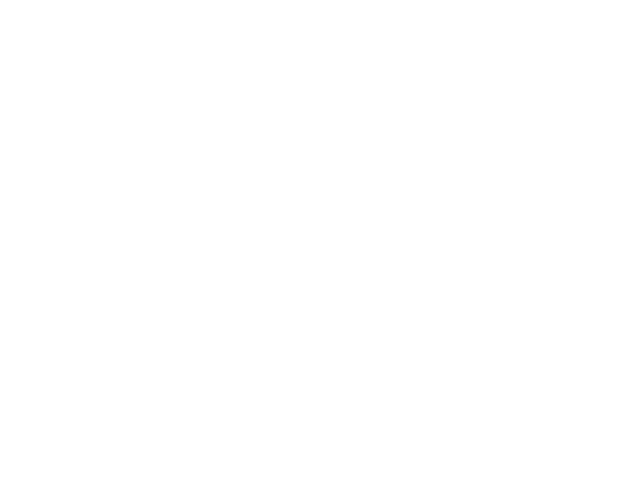

<IPython.core.display.Javascript object>


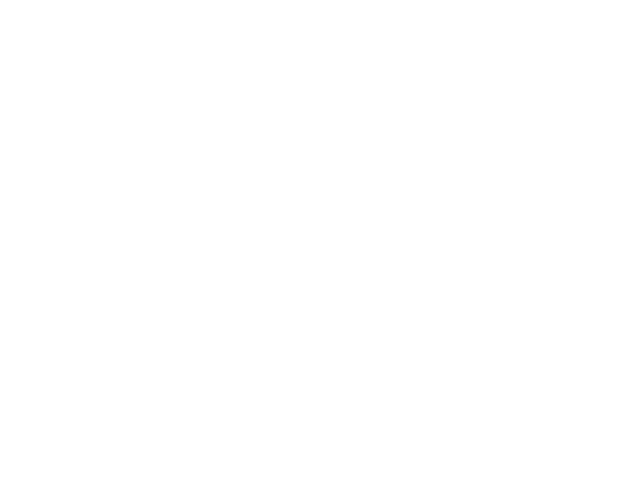

<IPython.core.display.Javascript object>


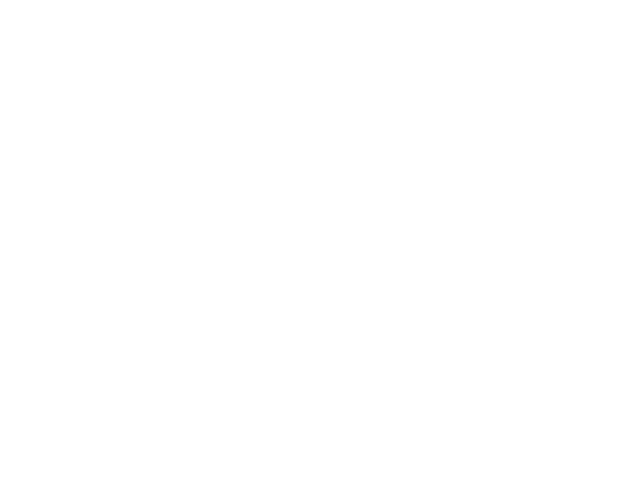

<IPython.core.display.Javascript object>


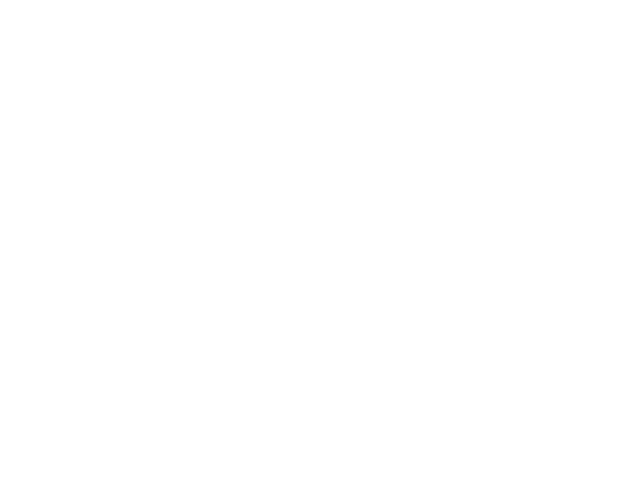

<IPython.core.display.Javascript object>


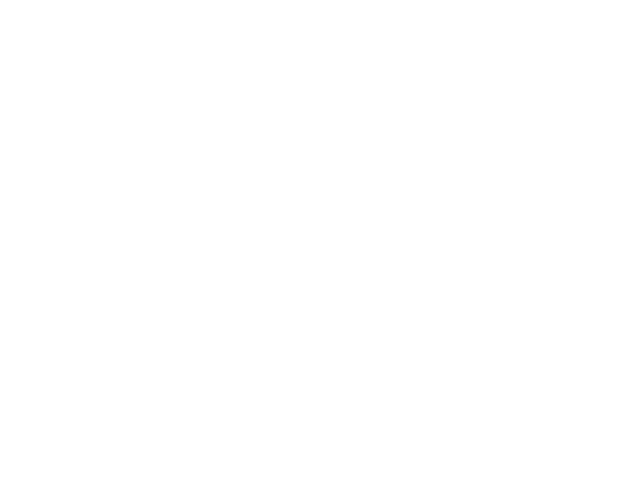

<IPython.core.display.Javascript object>


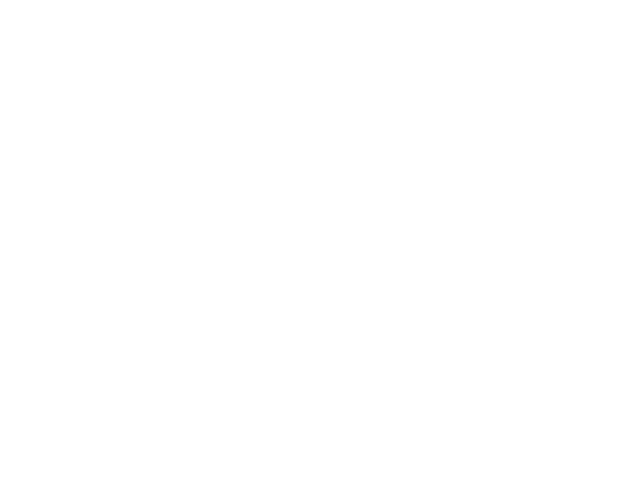

<IPython.core.display.Javascript object>


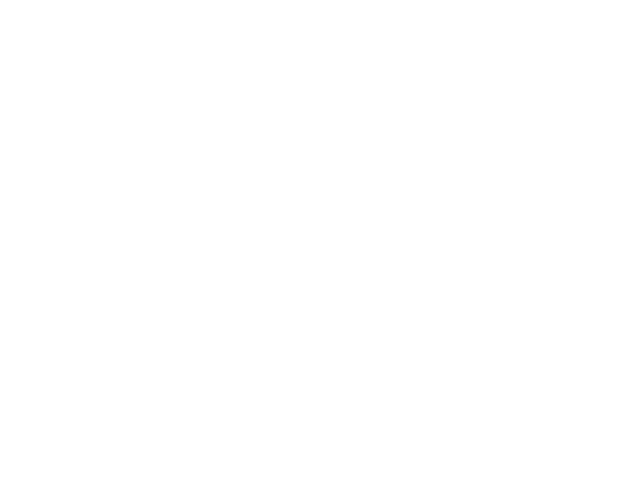

<IPython.core.display.Javascript object>


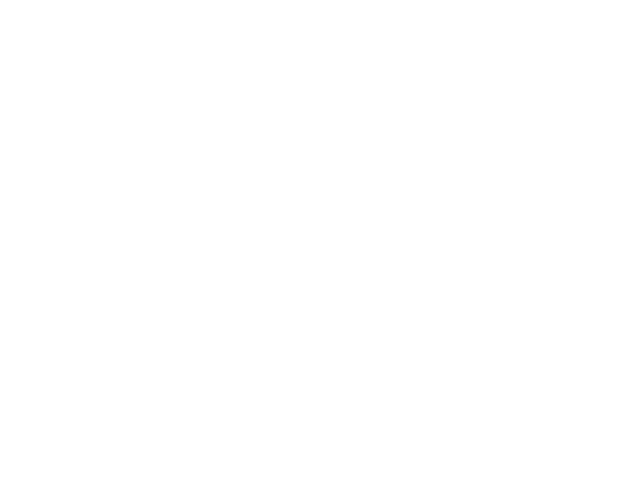

<IPython.core.display.Javascript object>


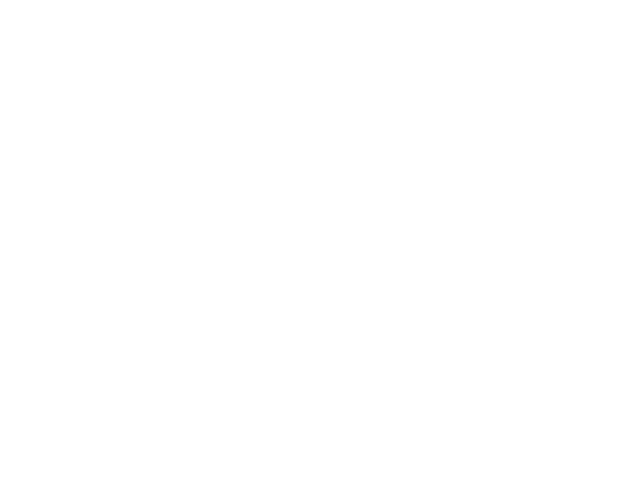

<IPython.core.display.Javascript object>


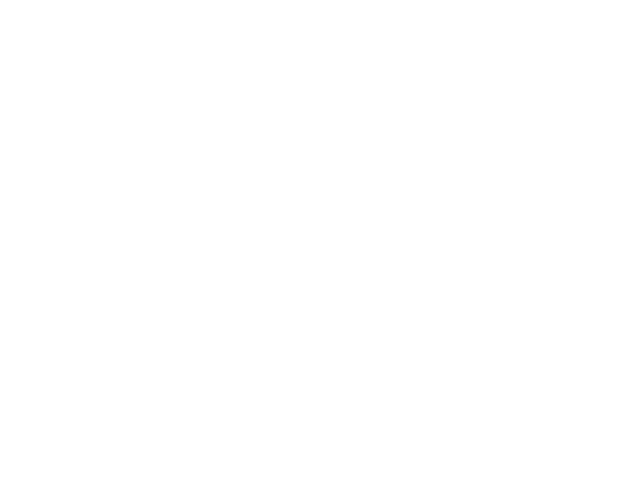

<IPython.core.display.Javascript object>


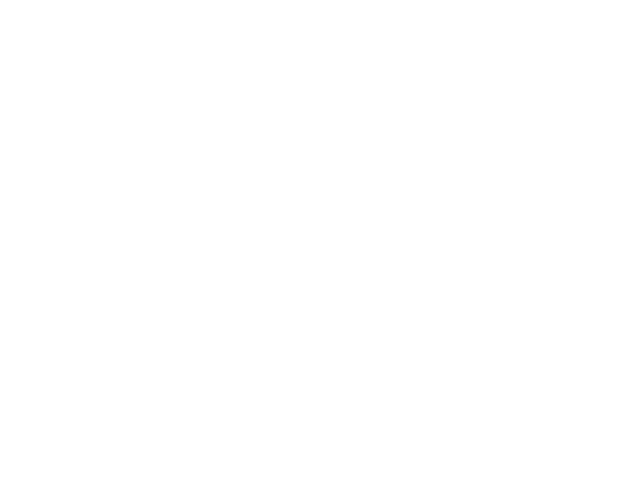

<IPython.core.display.Javascript object>


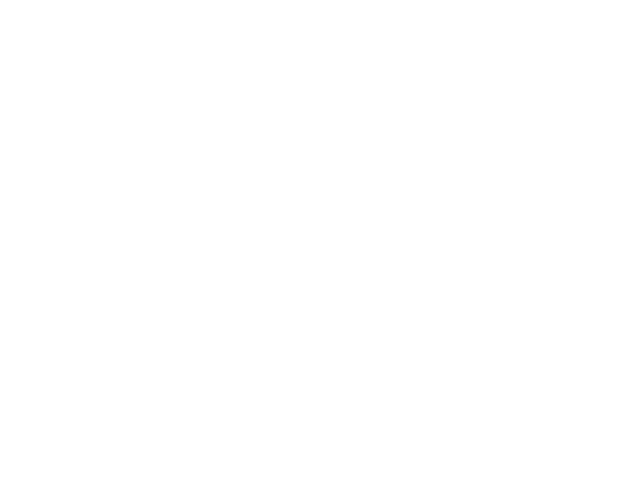

<IPython.core.display.Javascript object>


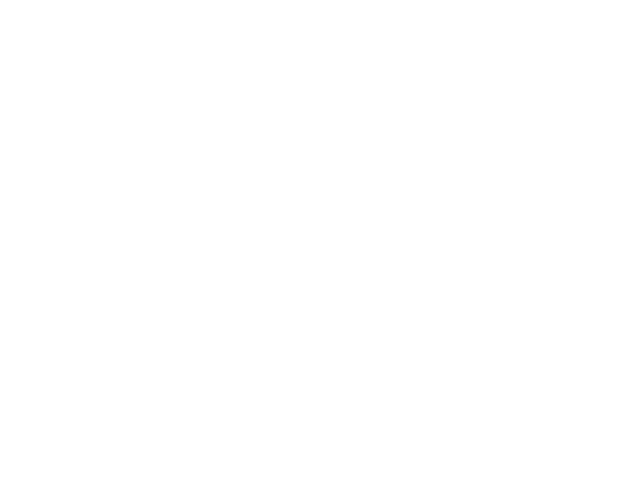

<IPython.core.display.Javascript object>


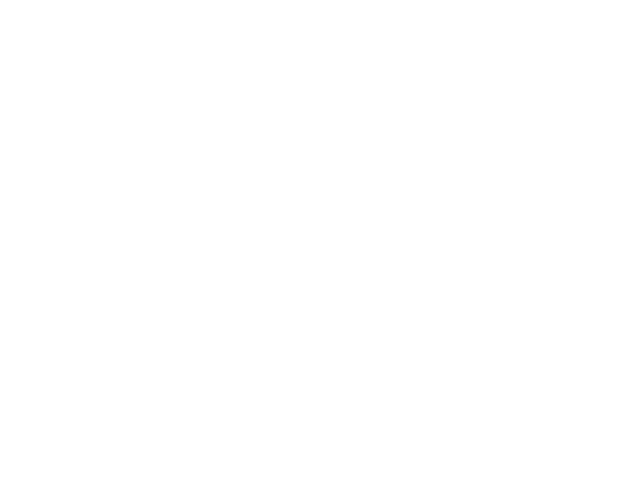

<IPython.core.display.Javascript object>


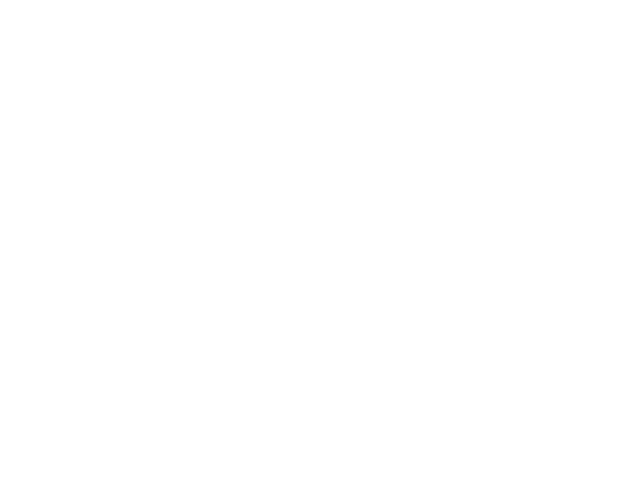

<IPython.core.display.Javascript object>


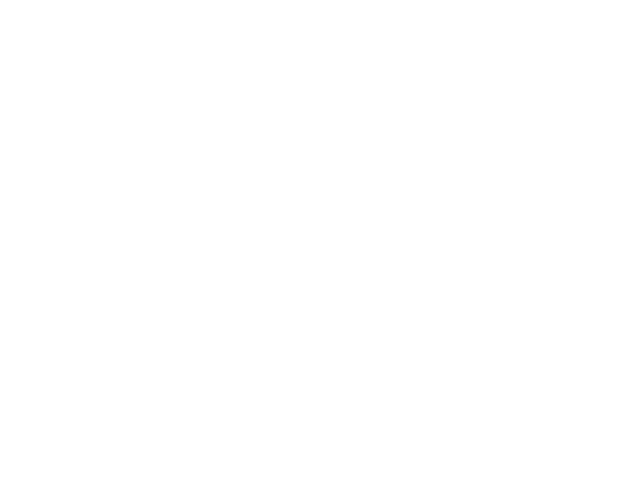

<IPython.core.display.Javascript object>


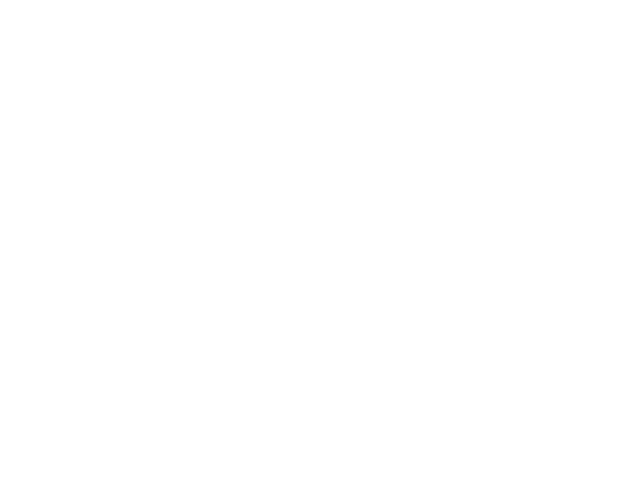

<IPython.core.display.Javascript object>


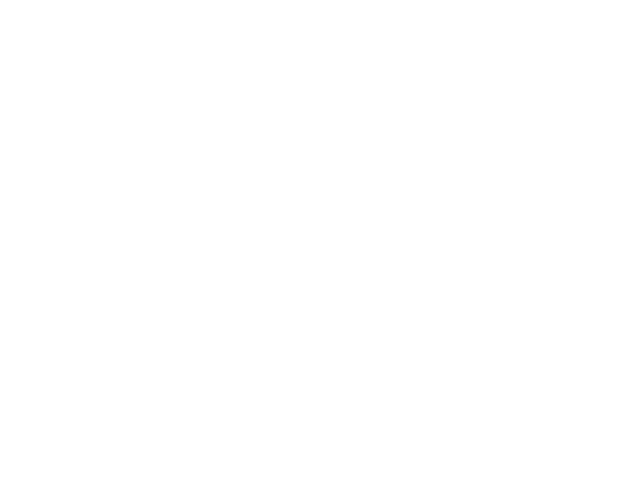

<IPython.core.display.Javascript object>


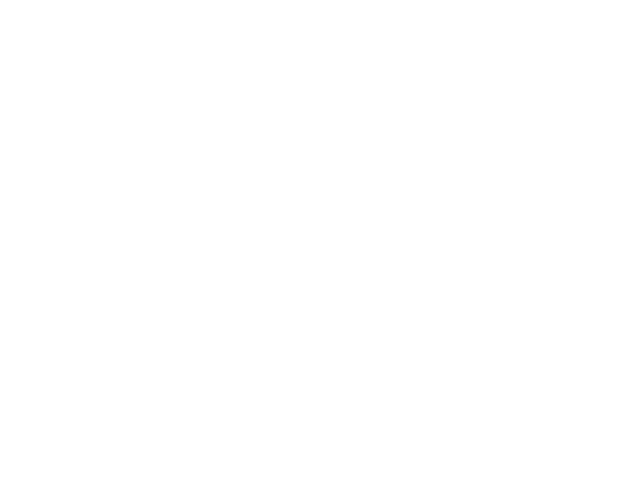

<IPython.core.display.Javascript object>


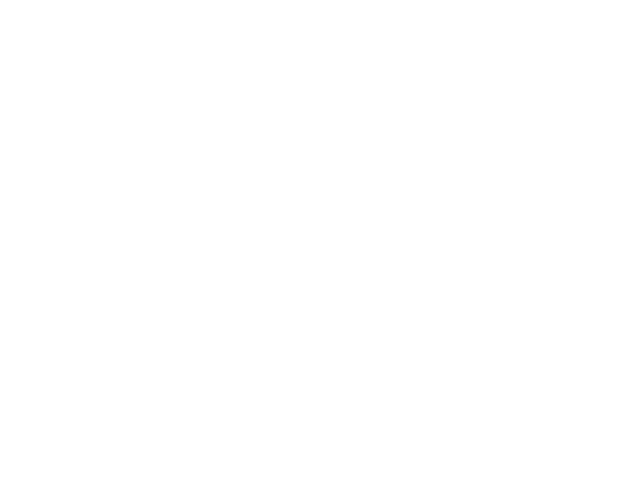

<IPython.core.display.Javascript object>


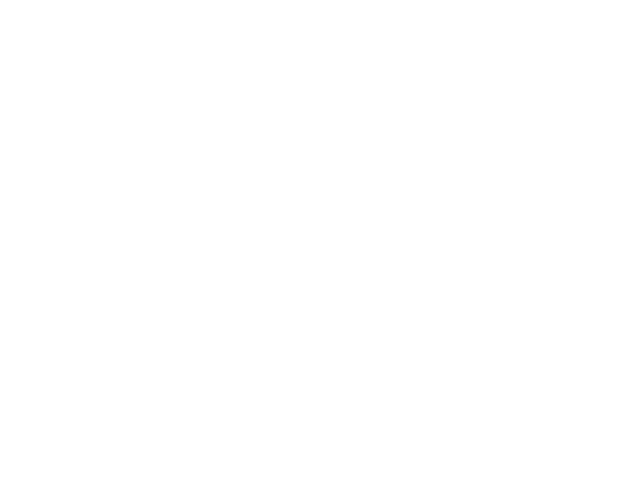

<IPython.core.display.Javascript object>


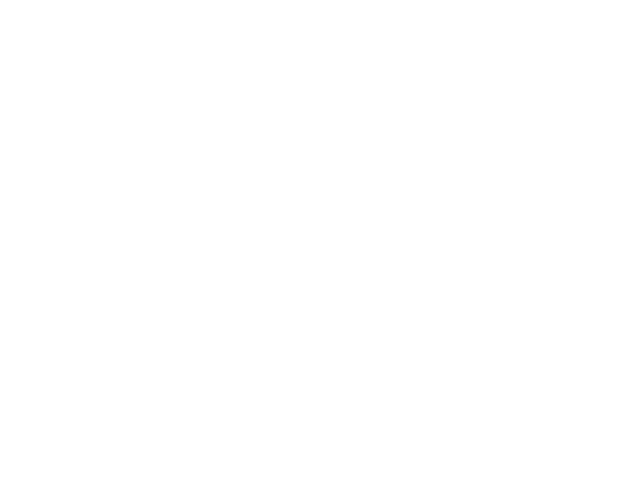

<IPython.core.display.Javascript object>


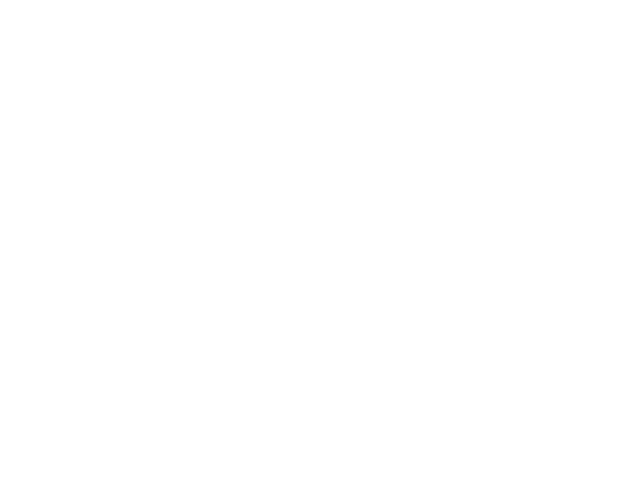

<IPython.core.display.Javascript object>


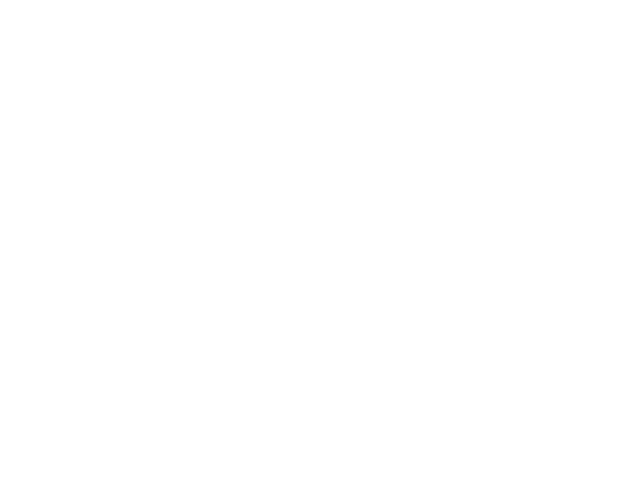

<IPython.core.display.Javascript object>


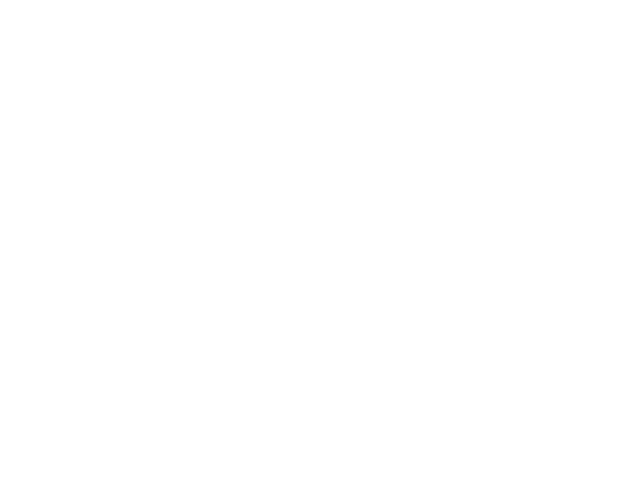

<IPython.core.display.Javascript object>


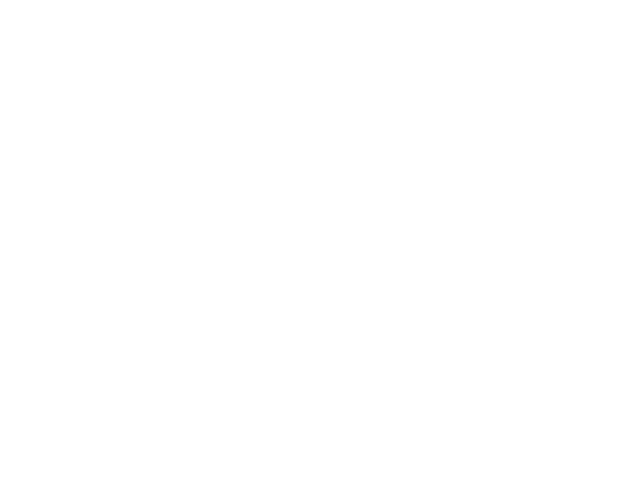

<IPython.core.display.Javascript object>


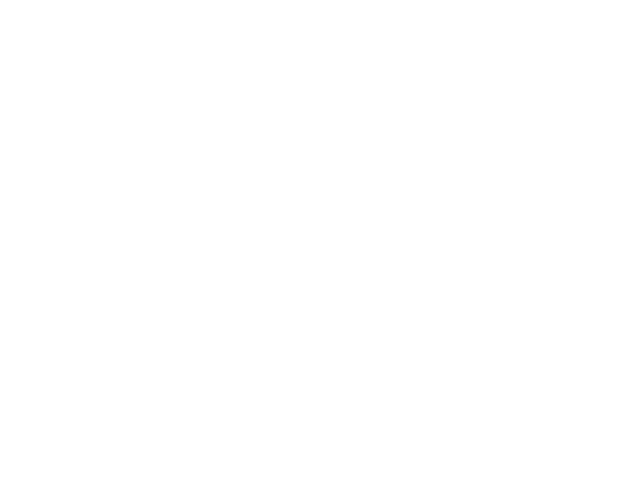

<IPython.core.display.Javascript object>


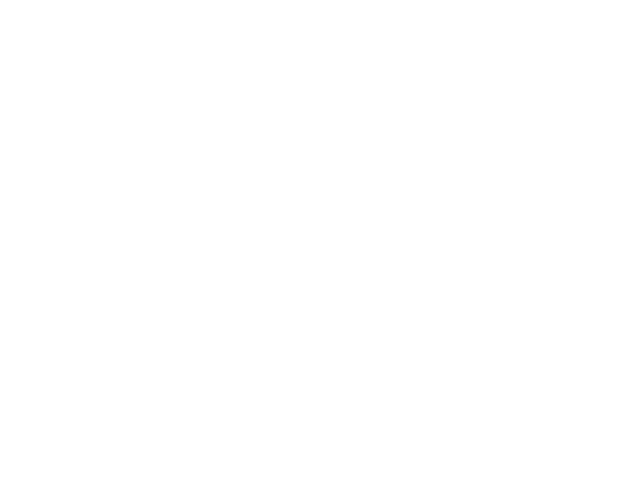

<IPython.core.display.Javascript object>


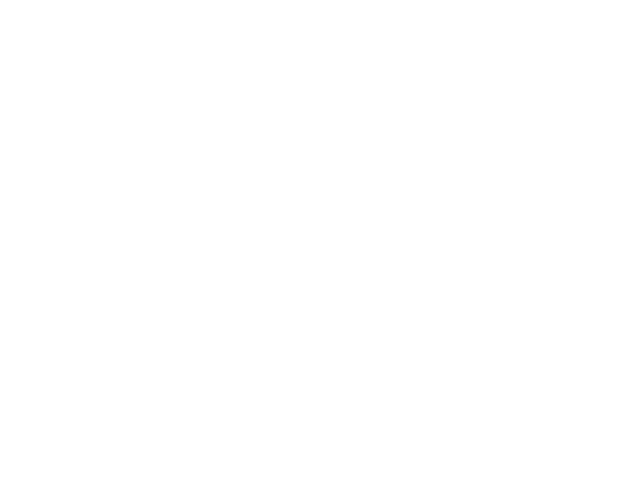

<IPython.core.display.Javascript object>


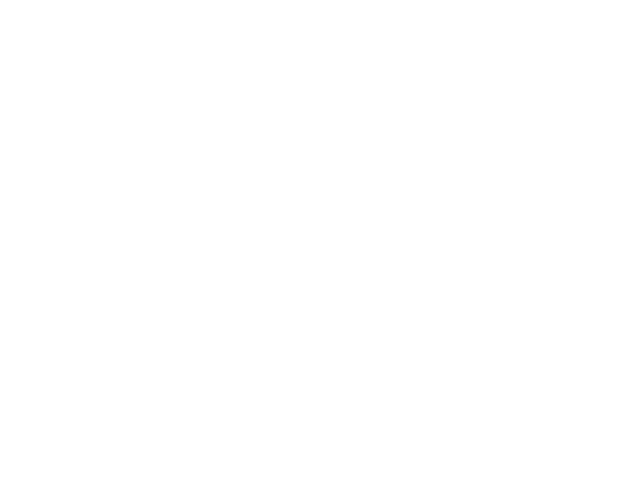

<IPython.core.display.Javascript object>


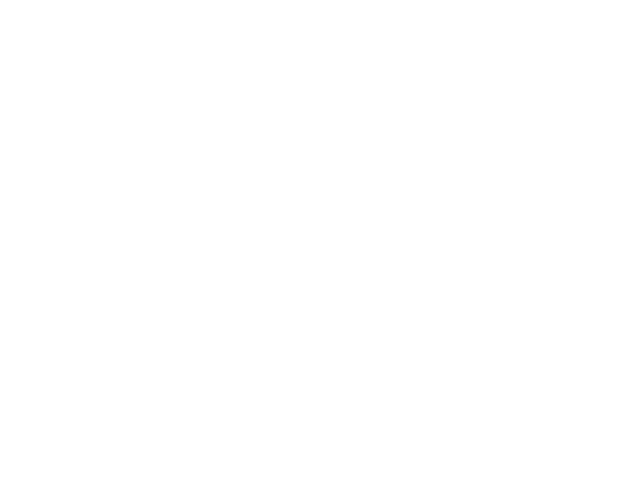

<IPython.core.display.Javascript object>


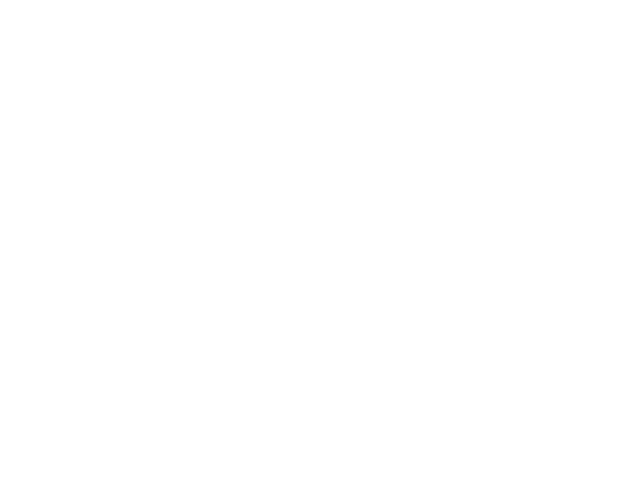

<IPython.core.display.Javascript object>


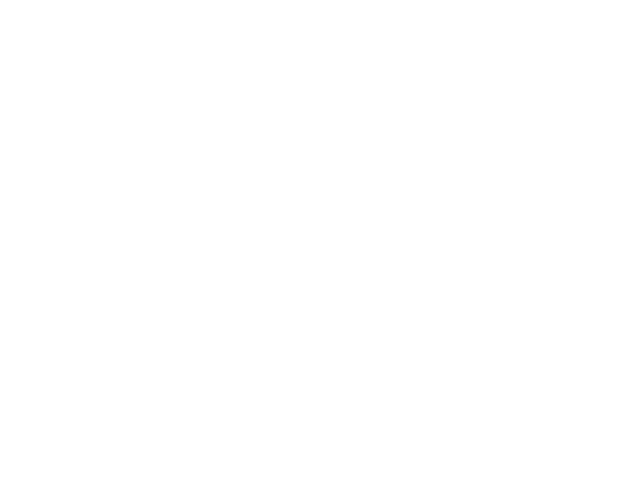

<IPython.core.display.Javascript object>


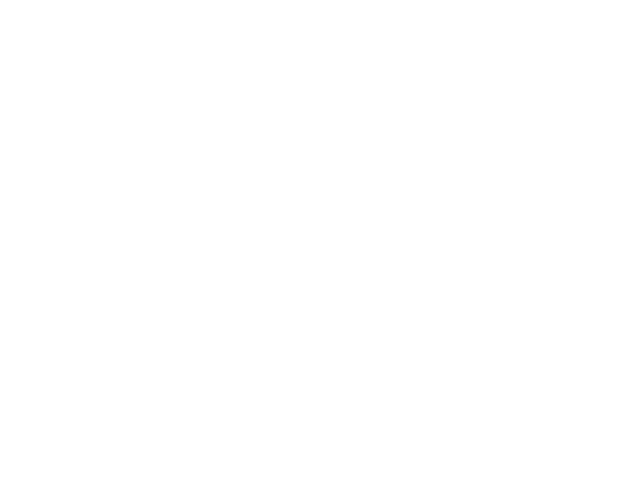

<IPython.core.display.Javascript object>


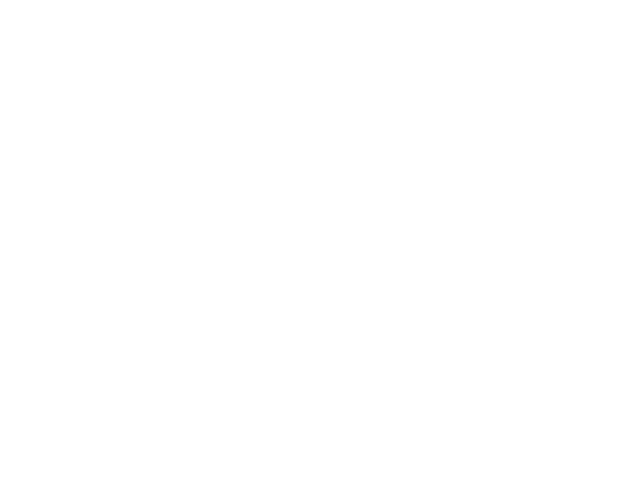

<IPython.core.display.Javascript object>


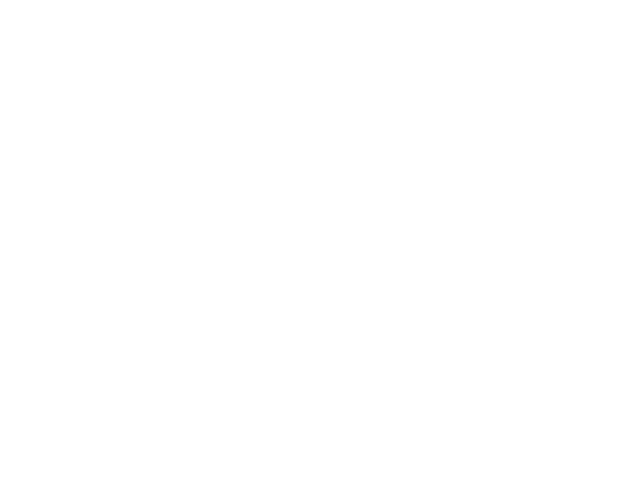

<IPython.core.display.Javascript object>


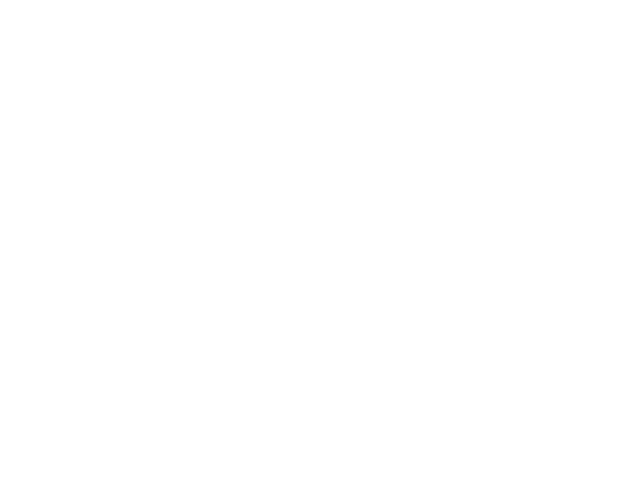

<IPython.core.display.Javascript object>


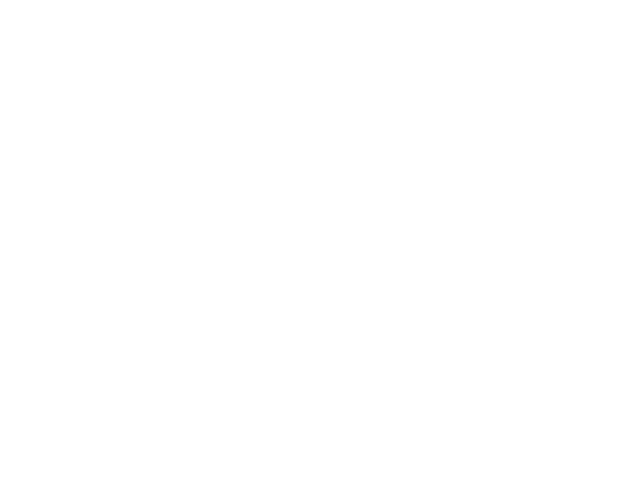

<IPython.core.display.Javascript object>


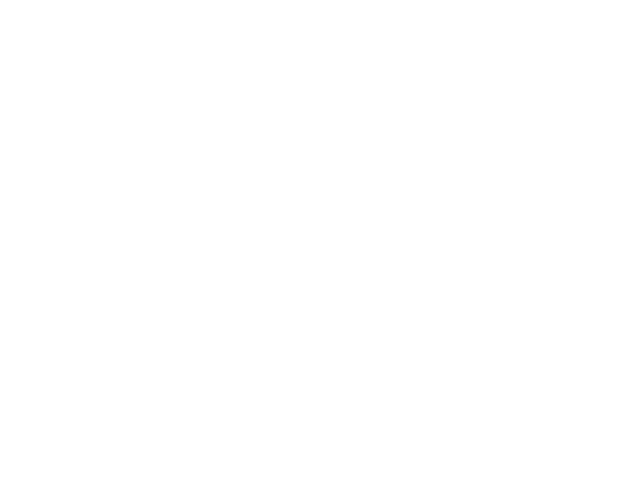

<IPython.core.display.Javascript object>


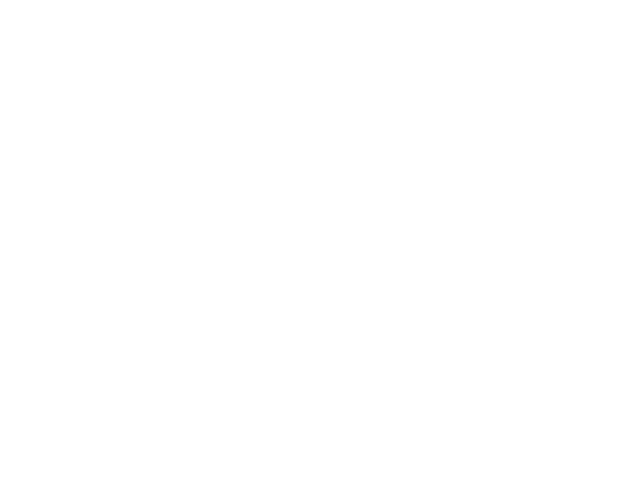

<IPython.core.display.Javascript object>


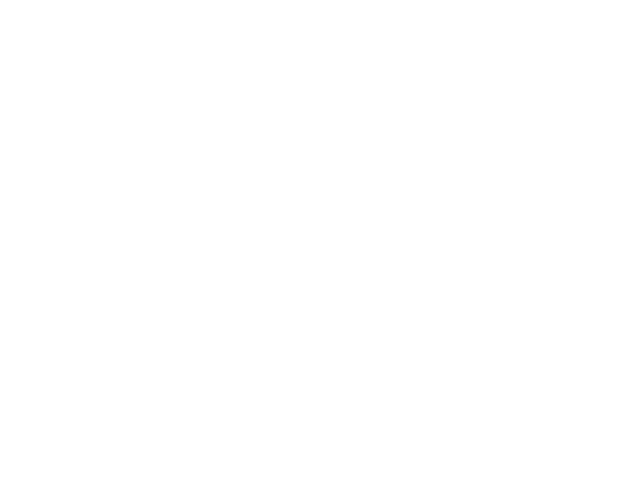

<IPython.core.display.Javascript object>


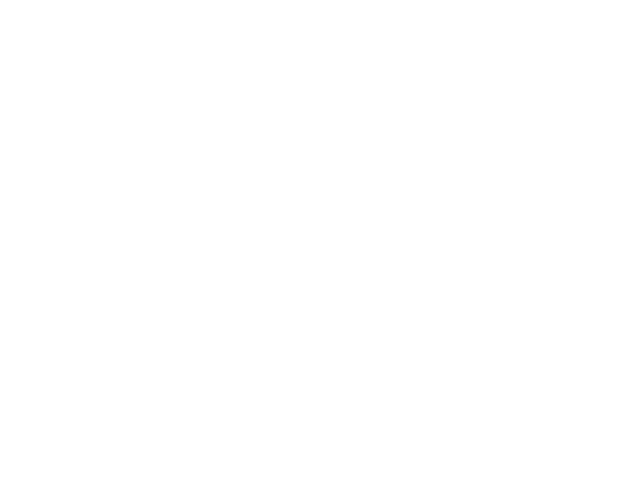

<IPython.core.display.Javascript object>


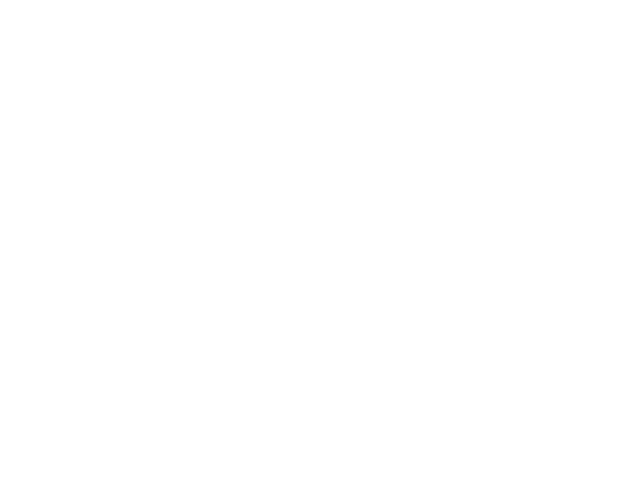

<IPython.core.display.Javascript object>


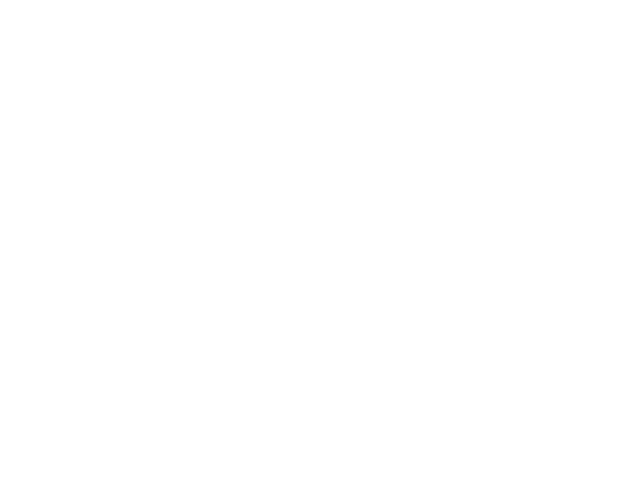

<IPython.core.display.Javascript object>


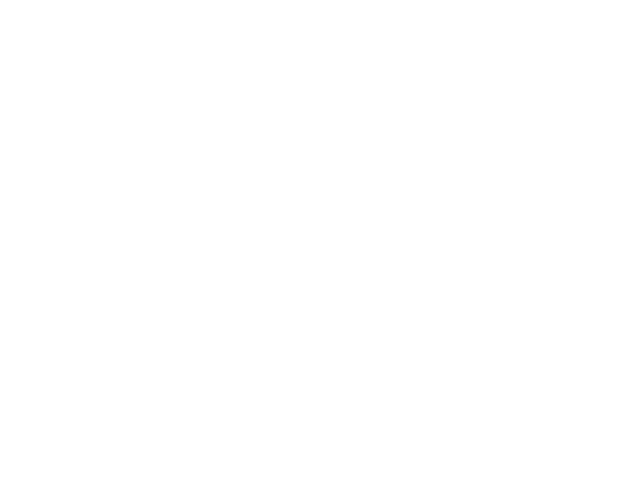

<IPython.core.display.Javascript object>


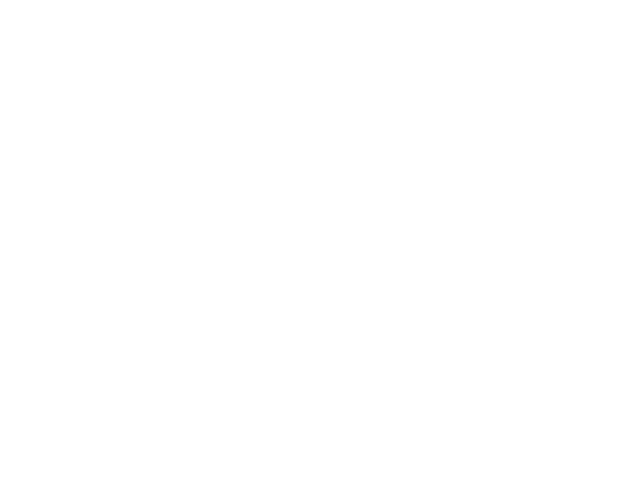

<IPython.core.display.Javascript object>


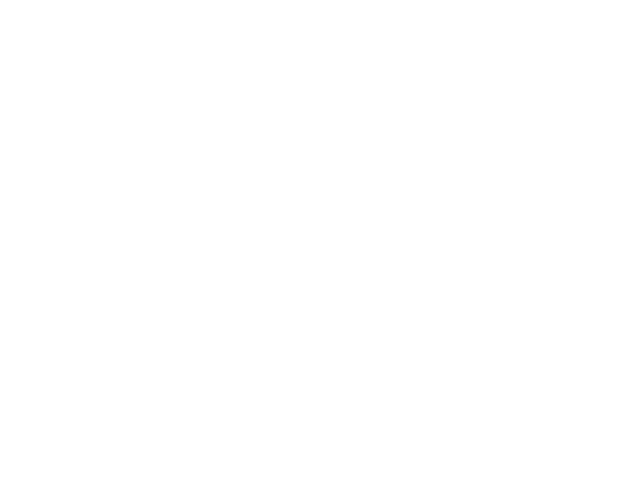

In [60]:
fig,ax = plt.subplots(1,2)

# Get an idea of what this looks like. There's a .gif of the full animation in this folder
ax[0].pcolor(xArr,yArr,rt[:,:, 25], cmap= 'gray')
ax[0].set_aspect('equal')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('Real space signal')

ax[1].pcolor(qx, qy, qwPower[:,:,25], cmap = 'gray')
ax[1].set_aspect('equal')
ax[1].set_xlabel('$q_x$')
ax[1].set_ylabel('$q_y$')
ax[1].set_title('Fourier space signal')

fig.subplots_adjust(wspace = 0.3)
fig.suptitle('$f(r,t) = \sin ($' + str(k0) + 'r + ' + str(w0) + 't) + $\sin($' + str(k1) + 'r + ' + str(w1) + 't)')

savestuff=1
if savestuff:
    if not os.path.exists(os.path.join(savepath, 'frames')): os.mkdir(os.path.join(savepath, 'frames'))
    for ii in range(0,nt):
        fig,ax = plt.subplots(1,2)

        ax[0].pcolor(xArr,yArr,rt[:,:, ii], cmap= 'gray')
        ax[0].set_aspect('equal')
        ax[0].set_xlabel('x')
        ax[0].set_ylabel('y')
        ax[0].set_title('Real space signal, t = {time:0.2f}'.format(time=dt*ii))

        ax[1].pcolor(qx, qy, qwPower[:,:,ii], cmap = 'gray')
        ax[1].set_aspect('equal')
        ax[1].set_xlabel('$q_x$')
        ax[1].set_ylabel('$q_y$')
        ax[1].set_title('Fourier space signal, $\omega =${w:0.2f}'.format(w=ww[ii]))

        fig.subplots_adjust(wspace = 0.3)
        fig.suptitle('$f(r,t) = \sin ($' + str(k0) + 'r + ' + str(w0) + 't)')
        
        fig.savefig(os.path.join(savepath,'frames','frame_'+str(ii)+'.png'),format='png')
        plt.close(fig)

First let's take a look at what we're analyzing

In [43]:
qwPowerRadialAvg = sqw.azimuthal_average_3D(qwPower,
                                            tdim=2,
                                           center=None,
                                           binsize=1.0,
                                           mask=None,
                                           weight=None)
[nw, nqr] = qwPowerRadialAvg.shape
#qr = np.fft.fftfreq(2*nqr, np.sqrt(dx**2+dy**2))

/Users/Danny/llm/dynamicstructurefactor/dynamicstructurefactor/sqw.py:66: RuntimeWarning: invalid value encountered in true_divide
  / np.histogram(r, bins, weights=mask * weight)[0]


In [31]:
savestuff=0

<IPython.core.display.Javascript object>


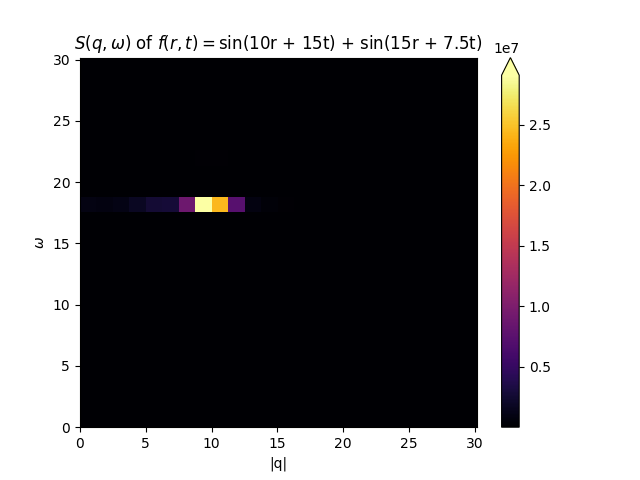

In [44]:
qxOneSided = np.fft.ifftshift(qx)[:int(np.floor(qx.size/2))]
wwOneSided = np.fft.ifftshift(ww)[:int(np.floor(ww.size/2))]

fig2, ax2 = plt.subplots(1,1)
oneSidedPower = qwPowerRadialAvg[25:-1,:]

sphericalSQW = ax2.pcolor(qxOneSided,wwOneSided,
                          oneSidedPower[:wwOneSided.size, :qxOneSided.size],
                          cmap='inferno')
ax2.set_xlabel('|q|')
ax2.set_ylabel('$\omega$')
ax2.set_title('$S(q,\omega)$ of $f(r,t) = \sin ($' + str(k0) + 'r + ' + str(w0) + 't) + $\sin($' + str(k1) + 'r + ' + str(w1) + 't)')

cbar = fig2.colorbar(sphericalSQW, extend='max')

if savestuff:
    fig2.savefig('sqw_sphericalWave.tif',format='tif')
    fig2.savefig('sqw_sphericalWave.eps',format='eps')
#     fig2.savefig('sqw_offset.tif',format='tif')
#     fig2.savefig('sqw_offset.eps',format='eps')

Okay, overall seems good. I'm a little unclear as to why the spatial component is smeared out a bit...

Update 7/11/2017: It's smeared out due to edge/corner effects, where the signal can't be described by a pure sine wave.

The single peak really gives the wave speeds here too, using a linear dispersion relation: $\omega = v q$

Normalize by $S(q)$ and look at $S(q,\omega)/S(q)$ to show it removes the signal along $q$

In [ ]:
sofcue = integrate.trapz(qwPowerRadialAvg, ww, axis=0)

normed = qwPowerRadialAvg/sofcue[:,None].T

fig, ax = plt.subplots()
ax.pcolor(qx[:72], ww, normed)


In [ ]:
qwPowerRadialAvg.shape